# Daily Weight Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

from ts_functions import all_ac, plot_forecast, stationarity_tests, diagnostic, compare_forecasts, cross_correlation, compare_statistics, first_order_look

plt.rcParams["figure.figsize"] = [12, 5]

In [8]:
df = pd.read_csv('weight.csv')
df.index = pd.to_datetime(df['date'])
df.index.freq = 'D'
df

,date,weight_lbs,exer,food,avg_7d
date,,,,,
2024-11-19,2024-11-19,160.4,1,5,160.00
2024-11-20,2024-11-20,159.2,1,6,160.00
2024-11-21,2024-11-21,159.0,0,5,160.03
2024-11-22,2024-11-22,159.2,1,6,159.86
2024-11-23,2024-11-23,159.0,0,5,159.66
...,...,...,...,...,...
2025-04-03,2025-04-03,154.8,1,7,155.63
2025-04-04,2025-04-04,154.6,1,6,155.31
2025-04-05,2025-04-05,154.4,1,5,155.26


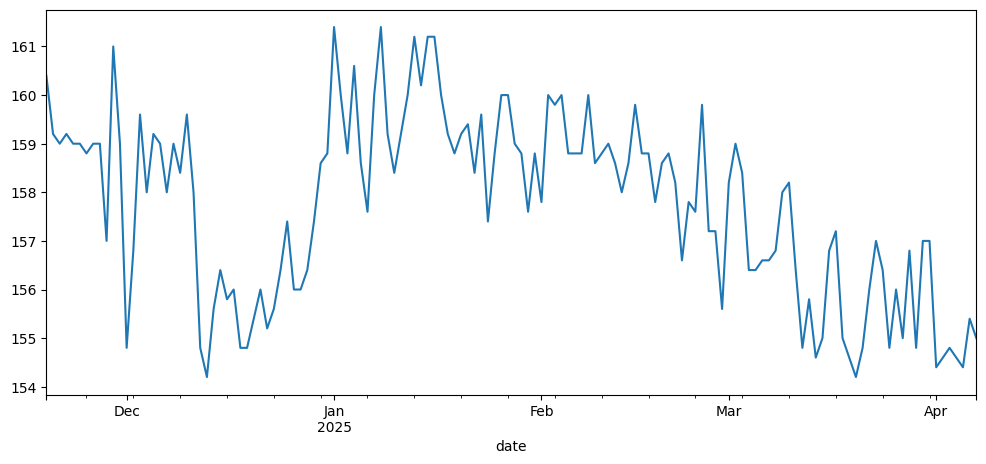

In [9]:
y = df['weight_lbs']
y.plot()
plt.show()

In [10]:
stationarity_tests(y)

('Non-Stationary', 'Non-Stationary')

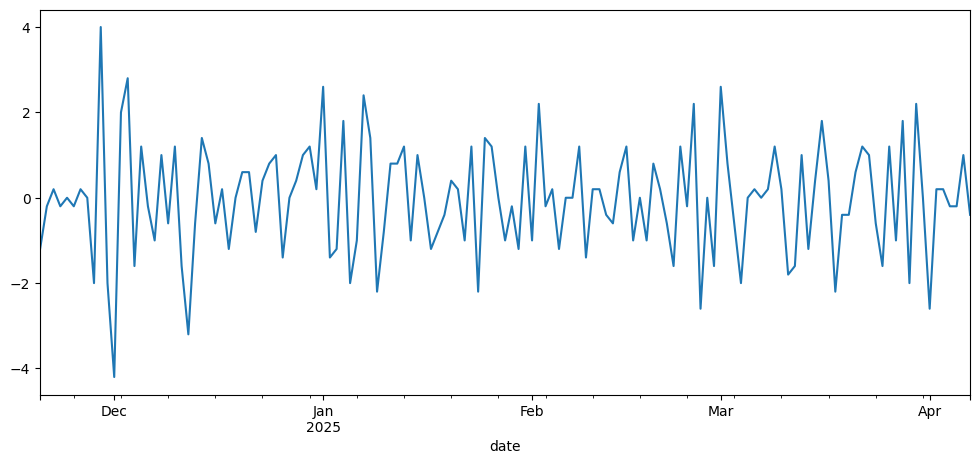

('Stationary', 'Stationary')


In [11]:
first_order_look(y)

                               SARIMAX Results                                
Dep. Variable:             weight_lbs   No. Observations:                  140
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -218.597
Date:                Tue, 08 Apr 2025   AIC                            443.194
Time:                        15:23:43   BIC                            451.998
Sample:                    11-19-2024   HQIC                           446.772
                         - 04-07-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4021      0.075     -5.385      0.000      -0.548      -0.256
ma.L2         -0.2488      0.071     -3.518      0.000      -0.387      -0.110
sigma2         1.3553      0.143      9.469      0.0

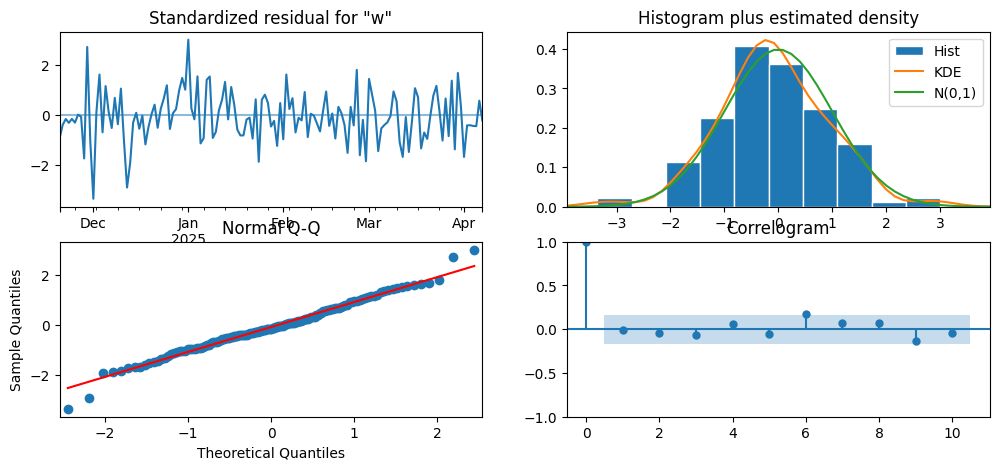

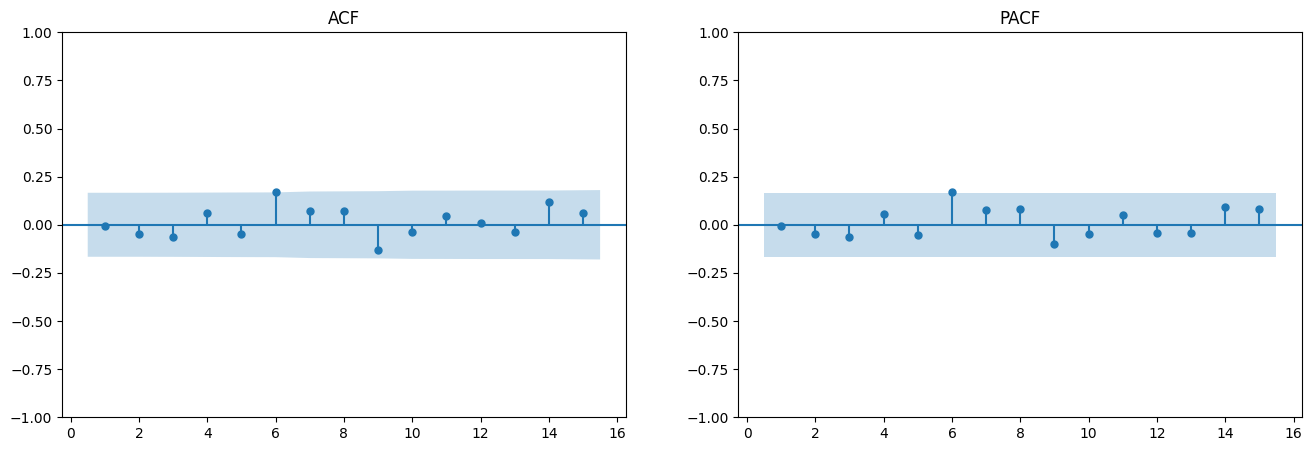

In [12]:
model1 = SARIMAX(y, order=(0,1,2)).fit(disp=False)
diagnostic(model1)

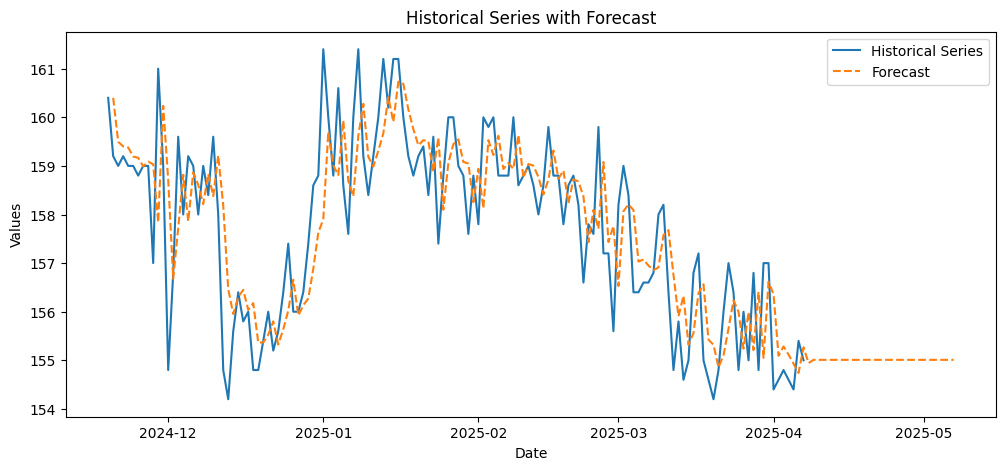

BIC = 452 - Training RMSE = 14


In [13]:
forecast = model1.forecast(30)
previsao = model1.fittedvalues[1:]
previsao1 = pd.concat([previsao, forecast])
rmse = np.sqrt(np.mean(model1.resid**2))
bic = model1.bic
plot_forecast(y,previsao1)
print(f'BIC = {round(bic)} - Training RMSE = {round(rmse)}')

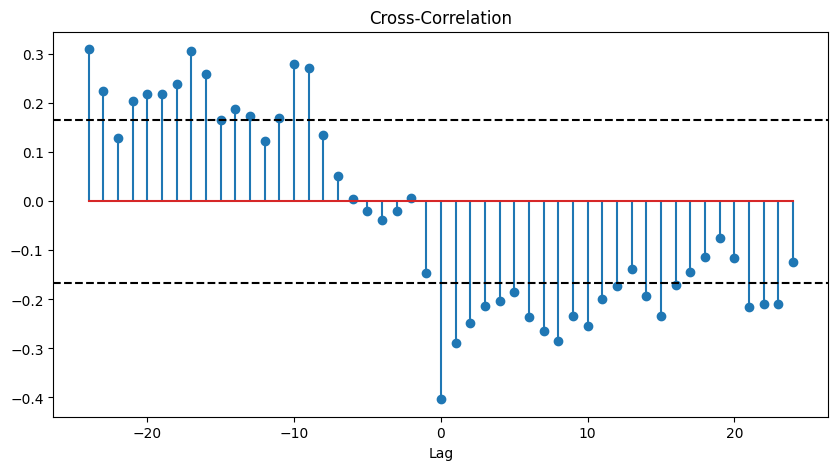

In [14]:
cross_correlation(y,df['food'])

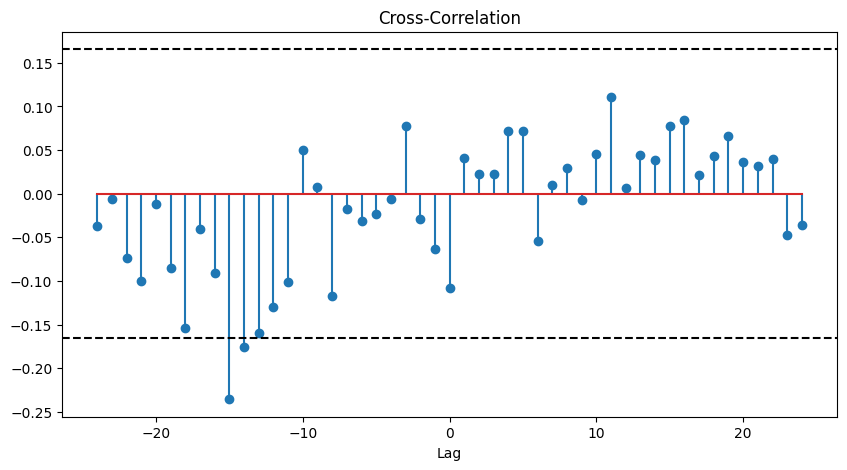

In [15]:
cross_correlation(y,df['exer'])

In [16]:
y = df['weight_lbs'].resample('3D').mean().diff().dropna()
x1 = df['food'].resample('3D').mean().shift().dropna()
x2 = df['exer'].resample('3D').sum().shift().dropna()
df_3D = pd.DataFrame({'y':y, 'food': x1, 'exer': x2})

In [17]:
stationarity_tests(y)

('Stationary', 'Stationary')

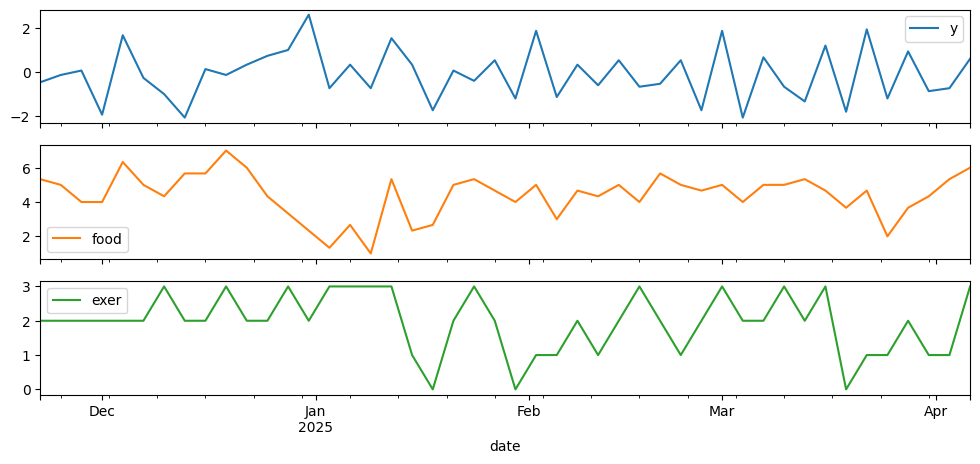

In [18]:
df_3D.plot(subplots=True)
plt.show()

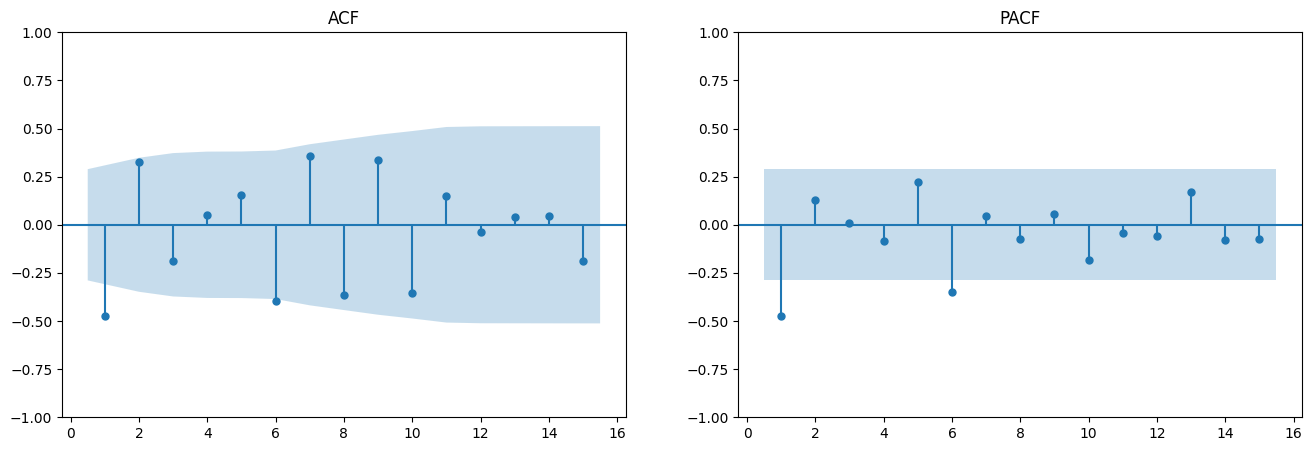

In [19]:
all_ac(y)

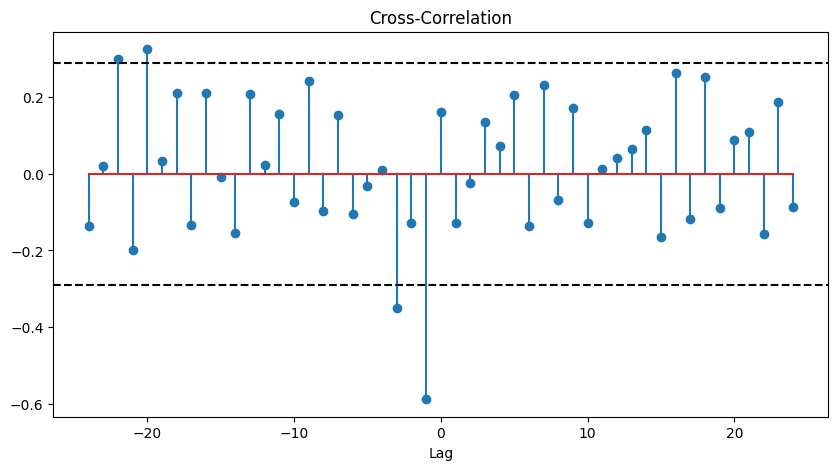

In [20]:
cross_correlation(y,x1)

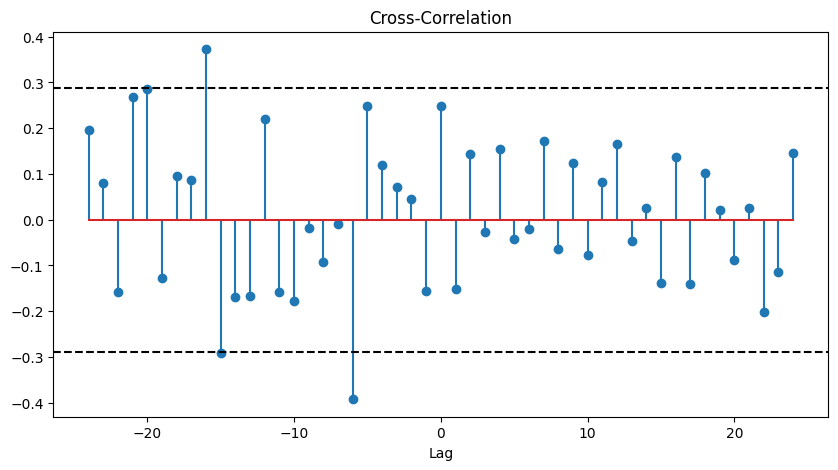

In [21]:
cross_correlation(y,x2)

                               SARIMAX Results                                
Dep. Variable:             weight_lbs   No. Observations:                   46
Model:                        SARIMAX   Log Likelihood                 -71.534
Date:                Tue, 08 Apr 2025   AIC                            149.068
Time:                        15:23:44   BIC                            154.554
Sample:                    11-22-2024   HQIC                           151.123
                         - 04-06-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
food          -0.0719      0.080     -0.901      0.367      -0.228       0.084
exer           0.1519      0.174      0.871      0.384      -0.190       0.494
sigma2         1.3130      0.337      3.892      0.0

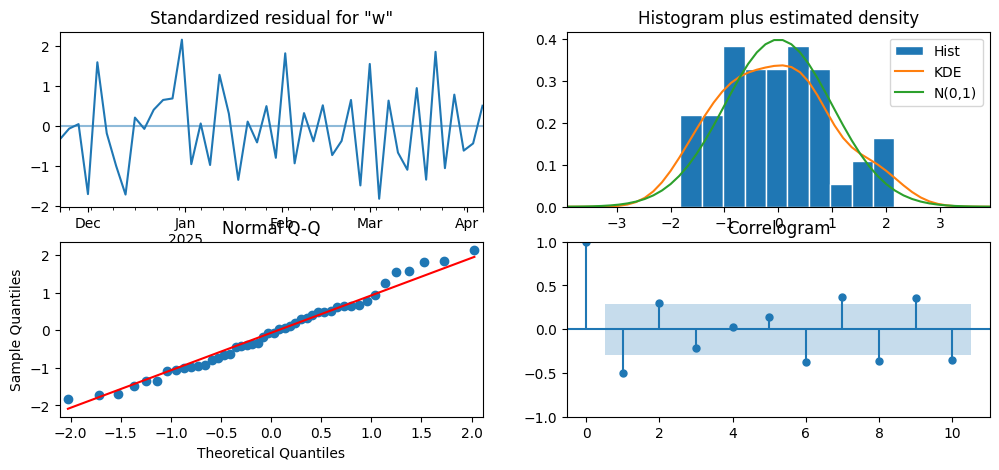

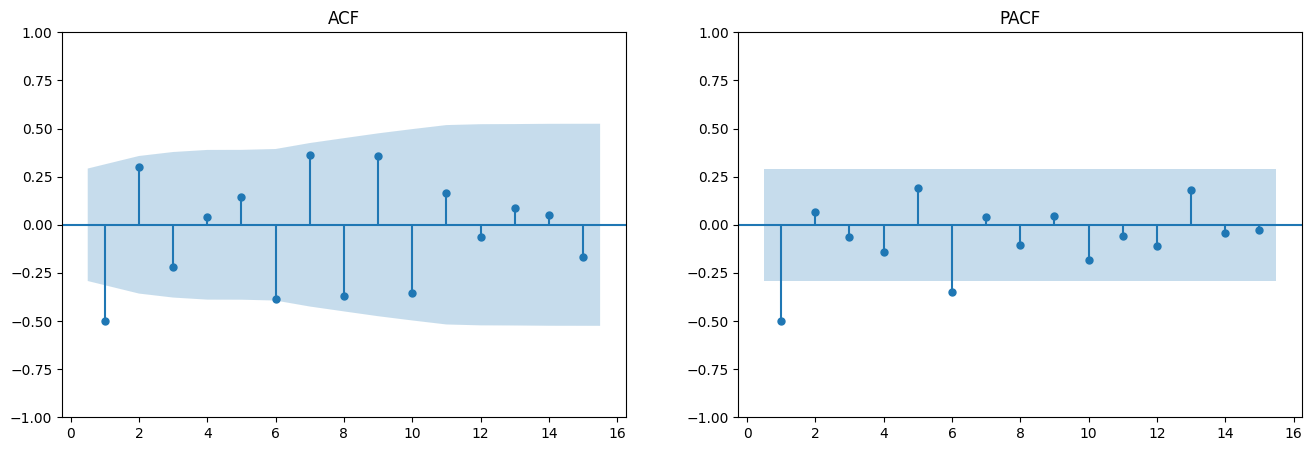

In [22]:
model2 = SARIMAX(y, order=(0,0,0), exog=df_3D[['food','exer']]).fit(disp=False)
diagnostic(model2)


In [23]:
from pmdarima import auto_arima

x = df_3D[['food','exer']]
auto_model = auto_arima(y, X=x,
                           information_criterion='bic',
                           trace=True)

/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' wa

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=148.957, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=155.111, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=149.060, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=151.320, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=154.554, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=158.224, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=153.266, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : BIC=161.320, Time=0.06 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=152.719, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.05 sec


/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' wa

 ARIMA(3,0,1)(0,0,0)[0] intercept   : BIC=156.365, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : BIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 0.570 seconds


/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/danielferreira/miniconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [24]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 -59.164
Date:                Tue, 08 Apr 2025   AIC                            134.328
Time:                        15:23:45   BIC                            148.957
Sample:                    11-22-2024   HQIC                           139.809
                         - 04-06-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.4767      2.519     -0.586      0.558      -6.414       3.460
food          -0.0608      0.124     -0.490      0.624      -0.304       0.183
exer           0.3050      0.162      1.886      0.059      -0.012       0.622
ar.L1         -1.8093      0.079    -22.838      0.000      -1.965      -1.654
ar.L2         -0.9329      0.078    -11.928      0.000      -1.086      -0.780
ma.L1          1.6032      0.218      7.343      0.000       1.175       2.031
ma.L2          0.6522      0.223      2.923      0.003       0.215       1.089
sigma2         0.7027      0.185      3.800      0.000       0.340       1.065
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.49   Prob(JB):                         0.91
Heteroskedasticity (H):               0.26   Skew:                            -0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""